In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
plt.style.use('ggplot')

## Read and check the data

In [3]:
data = pd.read_csv('SC_Magpie_short_July2018.csv')
data.shape

(5000, 147)

In [4]:
data["Cuprate"] = data.name.apply(lambda x: 1 if "Cu" in x and "O" in x else 0)
data["Fe-based"] = data.name.apply(lambda x: 1 if ("Fe" in x and "As" in x) 
                                          or ("Fe" in x and "Se" in x)
                                          or ("Fe" in x and "S" in x)
                                          or ("Fe" in x and "Te" in x)
                                          or ("Fe" in x and "P" in x)
                                          else 0)
indCuFe = data[(data["Fe-based"]==1)&(data["Cuprate"]==1)].index
data.set_value(indCuFe, "Fe-based", 0)

/home/stanev/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


,name,Tc,NComp,Comp_L2Norm,Comp_L3Norm,Comp_L5Norm,Comp_L7Norm,Comp_L10Norm,mean_Number,maxdiff_Number,...,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar,Cuprate,Fe-based
0,Ba0.4K0.6Fe2As2,31.200,4,0.583781,0.506891,0.459606,0.441643,0.428710,30.360000,37,...,197.500000,0.198312,0.126582,0.675105,0.000000,0,0.370230,0.101293,0,1
1,Ca0.4Ba1.25La1.25Cu3O6.98,40.100,5,0.606413,0.557901,0.543545,0.542136,0.541937,22.677795,49,...,12.000000,0.277798,0.340779,0.381423,0.000000,0,0.803211,0.321647,1,0
2,Mo0.39Ru0.61,6.900,2,0.724017,0.659084,0.622509,0.613736,0.610693,43.220000,2,...,194.000000,0.138504,0.000000,0.861496,0.000000,0,0.000400,0.000190,0,0
3,Tm4Os6Sn19,1.100,3,0.700772,0.663969,0.655637,0.655203,0.655173,58.000000,26,...,141.000000,0.126638,0.082969,0.493450,0.296943,0,0.201983,0.036805,0,0
4,Nd1Bi0.99Pb0.01S2F0.3O0.7,4.850,6,0.512258,0.435720,0.405168,0.400893,0.400075,36.658000,75,...,70.000000,0.187652,0.286921,0.187652,0.337774,0,0.866866,0.228340,0,0
5,V0.784Ga0.172Al0.044,9.400,3,0.803851,0.786796,0.784080,0.784003,0.784000,23.936000,18,...,229.000000,0.318066,0.034351,0.647583,0.000000,0,0.009950,0.002333,0,0
6,La1.71Sr0.29Cu0.94Co0.06O4,33.000,5,0.637204,0.588349,0.573132,0.571645,0.571440,24.195714,49,...,12.000000,0.321754,0.394186,0.284060,0.000000,0,0.787757,0.331360,1,0
7,Re0.1W0.9,0.000,2,0.905539,0.900411,0.900003,0.900000,0.900000,74.100000,1,...,229.000000,0.099502,0.000000,0.203980,0.696517,0,0.051525,0.009275,0,0
8,N0.82V1,2.900,2,0.710557,0.636063,0.585221,0.567202,0.556573,15.791209,16,...,229.000000,0.400000,0.270330,0.329670,0.000000,0,0.391662,0.193916,0,0
9,Be0.86Pb0.14,9.700,2,0.871321,0.861235,0.860020,0.860000,0.860000,14.920000,78,...,194.000000,0.354610,0.049645,0.248227,0.347518,0,0.134459,0.032378,0,0


In [5]:
X = data[data.columns[2:149]]
# print(X.shape)
y = data["Tc"] #y = result["Tc"]

print(X.shape)
print(y.shape)
X.head()

(5000, 147)
(5000,)


,NComp,Comp_L2Norm,Comp_L3Norm,Comp_L5Norm,Comp_L7Norm,Comp_L10Norm,mean_Number,maxdiff_Number,dev_Number,max_Number,...,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar,Cuprate,Fe-based
0,4,0.583781,0.506891,0.459606,0.441643,0.428710,30.360000,37,6.214400,56,...,197.5,0.198312,0.126582,0.675105,0.000000,0,0.370230,0.101293,0,1
1,5,0.606413,0.557901,0.543545,0.542136,0.541937,22.677795,49,16.074864,57,...,12.0,0.277798,0.340779,0.381423,0.000000,0,0.803211,0.321647,1,0
2,2,0.724017,0.659084,0.622509,0.613736,0.610693,43.220000,2,0.951600,44,...,194.0,0.138504,0.000000,0.861496,0.000000,0,0.000400,0.000190,0,0
3,3,0.700772,0.663969,0.655637,0.655203,0.655173,58.000000,26,10.482759,76,...,141.0,0.126638,0.082969,0.493450,0.296943,0,0.201983,0.036805,0,0
4,6,0.512258,0.435720,0.405168,0.400893,0.400075,36.658000,75,27.869600,83,...,70.0,0.187652,0.286921,0.187652,0.337774,0,0.866866,0.228340,0,0


Focus on materials with $T_c$ > 1 K

In [72]:
X_high=X[y>1]
y_high=y[y>1]
X_high.shape

(3507, 147)

## Simple RF regression

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_high, y_high,  test_size=0.2,  random_state=20) #stratify=X[["Cuprate", "Fe-based"]]
print(X_test.shape)

from sklearn.ensemble import RandomForestRegressor

preds = X.columns[0:145]

rf = RandomForestRegressor(n_estimators=100, random_state =51, oob_score = True)

rf.fit( X_train[preds[0:145]], y_train) #[index_30]
print(rf.oob_score_ , rf.score(X_test[preds], y_test))
# X_test_pred = rf.predict(X_test)

(702, 147)
0.8603665828377223 0.827539670773227


In [74]:
print(rf)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=51, verbose=0, warm_start=False)


## Optimize the model

Use GridSearch to find better hyper-parameters

In [78]:
#from sklearn.grid_search import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestRegressor
#digits = load_boston()
#X, y = dataset.data, dataset.target

# z = y.apply(lambda x: 1 if x > 10 else 0)

model = RandomForestRegressor(random_state=30)
param_grid = {"n_estimators"      : [200, 300, 500],
           "max_features"      : [0.2, 0.3, 0.4], #,
              'max_depth': [30, 35, None],
            'min_samples_split':range(2, 6, 2)
         # "bootstrap": [True, False]
             }
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=5)
grid_search.fit(X_train[preds], y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 30, 'max_features': 0.3, 'min_samples_split': 2, 'n_estimators': 500}
0.8649831724935054


## Plot the results

In [79]:
rf = RandomForestRegressor(n_estimators=500, random_state =30, oob_score = True, 
                           max_depth=30, max_features= 0.3, min_samples_split=2)

rf.fit( X_train[preds], y_train) #[index_30]
y_test_pred = rf.predict(X_test[preds])

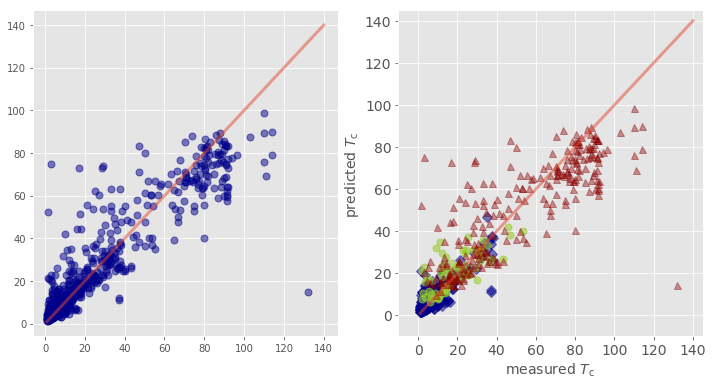

In [91]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plot figure with subplots of different sizes
fig = plt.figure()
# set up subplot grid
ts=14
ts2=16
symbol_low = 'D'
symbol_Cu = '^'
symbol_Fe ='o'
ms=7
ms2=6
lg_font = 17

low_Tc_test = (X_test["Cuprate"]==0)&(X_test["Fe-based"]==0)
Fe_based_test = X_test["Fe-based"]==1
Cuprate_test = X_test["Cuprate"]==1

plt.subplot(121)
p1, = plt.plot(y_test, y_test_pred, 
         'o',  color = "DarkBlue", ms=7, alpha=0.5)
plt.plot([1, 140], [1, 140], lw = 3, alpha = 0.5)

plt.subplot(122)
p1, = plt.plot(y_test[low_Tc_test], y_test_pred[low_Tc_test], 
         symbol_low, color = "DarkBlue", ms = ms, alpha = 0.5)
p2, = plt.plot(y_test[Fe_based_test], y_test_pred[Fe_based_test], symbol_Fe, color="YellowGreen", ms = 7, alpha = 0.6)
p3, = plt.plot(y_test[Cuprate_test], y_test_pred[Cuprate_test], symbol_Cu, color = "DarkRed", ms = 7, alpha = 0.4)

plt.plot([1, 140], [1, 140], lw = 3, alpha = 0.5)
plt.ylim(-10, 145)
plt.xlim(-10, 145)
plt.xlabel('measured $T_{\mathrm{c}}$ ', fontsize=14) #r'$T_{\mathrm{c}}$ (K)'
plt.ylabel('predicted $T_{\mathrm{c}}$ ', fontsize=14)
# plt.legend((p1,  p2, p3), ( "low-$T_{\mathrm{c}}$",r'Fe-based', "cuprates") ,loc= (0.05, 0.75),numpoints=1 , fontsize=14)
# plt.text(2.3, 4.8,'Low-$T_c$ (blue)', ha='left', va='center', fontsize=12)
# plt.text(2.3, 4.7, r'Cuprates (red)', ha='left', va='center', fontsize=12)
# plt.text(2.3, 4.6, r'Fe-based (cyan)', ha='left', va='center', fontsize=12)
# plt.text(90, 130, r'$R^2 \approx 0.885$', ha='left', va='center', fontsize=14)
plt.xticks(fontsize = ts)
plt.yticks(fontsize = ts)
plt.show()
# plt.savefig('Regr_non_log.pdf', format='pdf', dpi=300)

### Plot the residuals

(-50, 50)

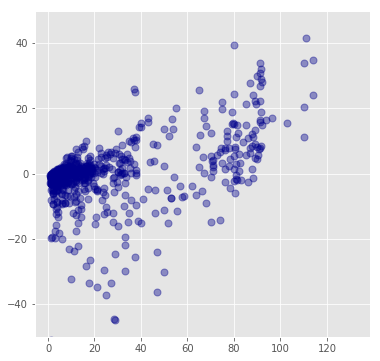

In [92]:
plt.rcParams['figure.figsize'] = (6.0, 6.0)
plt.plot(y_test, y_test - y_test_pred, 'o', color = "DarkBlue", ms=7, alpha=0.4)
plt.ylim(-50, 50)

## Create regression for a single family

In [42]:
low_Tc_train = (X_train["Cuprate"]==0)&(X_train["Fe-based"]==0)
Fe_based_train = X_train["Fe-based"]==1
Cuprate_train = X_train["Cuprate"]==1


rf_low = RandomForestRegressor(n_estimators=500, random_state =1, oob_score = True, max_features = 0.2,
                            max_depth = 25, min_samples_split=2)
# rf_low = RandomForestRegressor(n_estimators=500, random_state =51, oob_score = True, max_features = "sqrt",
#                             max_depth = 25)

rf_Cu = RandomForestRegressor(n_estimators=500, random_state =1, oob_score = True, max_features = 0.2,
                             max_depth = 25, min_samples_split=2)

rf_low.fit( X_train[low_Tc_train], y_train[low_Tc_train]) #[index_30] #[cond]
rf_Cu.fit( X_train[Cuprate_train], y_train[Cuprate_train]) #[index_30] #[cond]

print(rf_low.oob_score_ , rf_low.score(X_test[low_Tc_test], y_test[low_Tc_test])) 
print(rf_Cu.oob_score_ , rf_Cu.score(X_test[Cuprate_test], y_test[Cuprate_test]))

0.7074869208055008 0.8361056867729735
0.7266129556423323 0.671426205345731


Text(0,0.5,'predicted $T_{\\mathrm{c}}$ ')

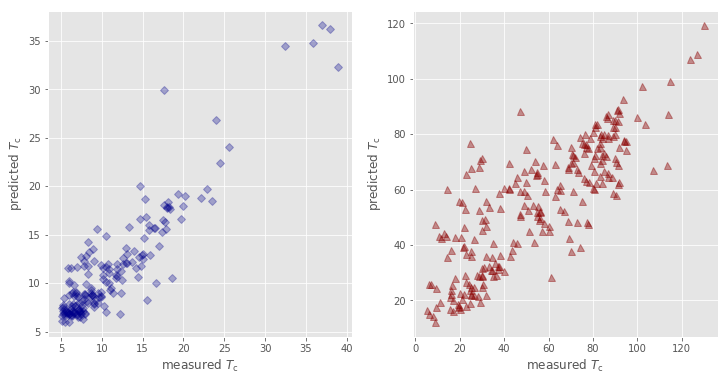

In [43]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)

low_Tc_test_pred = rf_low.predict(X_test[low_Tc_test])
Cuprate_test_pred = rf_Cu.predict(X_test[Cuprate_test])

plt.subplot(121)
plt.plot(y_test[low_Tc_test], low_Tc_test_pred, 
         symbol_low, color = "DarkBlue", ms = 5, alpha = 0.3)
plt.xlabel('measured $T_{\mathrm{c}}$ ', fontsize=12) 
plt.ylabel('predicted $T_{\mathrm{c}}$ ', fontsize=12)


plt.subplot(122)
plt.plot(y_test[Cuprate_test], Cuprate_test_pred, symbol_Cu, color = "DarkRed", ms = 7, alpha = 0.4)
plt.xlabel('measured $T_{\mathrm{c}}$ ', fontsize=12) #r'$T_{\mathrm{c}}$ (K)'
plt.ylabel('predicted $T_{\mathrm{c}}$ ', fontsize=12)

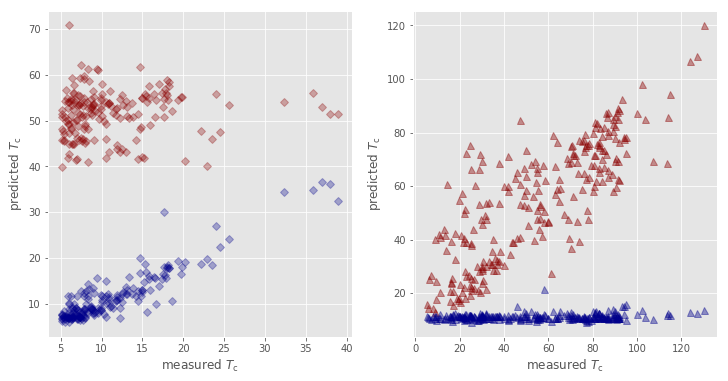

In [45]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)

low_Tc_test_pred_Cu = rf_Cu.predict(X_test[low_Tc_test])
Cuprate_test_pred_low = rf_low.predict(X_test[Cuprate_test])

plt.subplot(121)
plt.plot(y_test[low_Tc_test], low_Tc_test_pred, 
         symbol_low, color = "DarkBlue", ms = 5, alpha = 0.3)
plt.plot(y_test[low_Tc_test], low_Tc_test_pred_Cu, 
         symbol_low, color = "DarkRed", ms = 5, alpha = 0.3)
plt.xlabel('measured $T_{\mathrm{c}}$ ', fontsize=12) 
plt.ylabel('predicted $T_{\mathrm{c}}$ ', fontsize=12)

plt.subplot(122)
plt.plot(y_test[Cuprate_test], y_test_pred[Cuprate_test], symbol_Cu, color = "DarkRed", ms = 7, alpha = 0.4)
plt.plot(y_test[Cuprate_test], Cuprate_test_pred_low, symbol_Cu, color = "DarkBlue", ms = 7, alpha = 0.4)
plt.xlabel('measured $T_{\mathrm{c}}$ ', fontsize=12) 
plt.ylabel('predicted $T_{\mathrm{c}}$ ', fontsize=12)

plt.show()